In [1]:
import pandas as pd

In [2]:
fact = pd.read_csv('flights_fact.csv', usecols=['AIRLINE', 'scheduledDeparture_key', 'AIR_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'delayed', 'ARRIVAL_DELAY', 'dateKey', 'SCHEDULED_TIME', 'DEPARTURE_DELAY'])

In [3]:
# date = pd.read_csv('date_dim.csv', usecols=['dateKey', 'DAY_OF_WEEK'])
# fact = pd.merge(fact, date, left_on='dateKey', right_on='dateKey')

# airport = pd.read_csv('departureAirport_dim.csv', usecols=['IATA_CODE', 'STATE'])
# fact = pd.merge(fact, airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

In [4]:
fact.sample(5)

,AIRLINE,scheduledDeparture_key,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,dateKey,delayed
3042049,DL,1309,-5.0,88.0,53.0,-3.0,NaN,NaN,NaN,NaN,NaN,20150817,0
1525514,WN,800,-4.0,105.0,78.0,-14.0,NaN,NaN,NaN,NaN,NaN,20150429,0
204158,OO,1940,-1.0,95.0,72.0,1.0,NaN,NaN,NaN,NaN,NaN,20150117,0
2992060,WN,1810,-6.0,65.0,45.0,-14.0,NaN,NaN,NaN,NaN,NaN,20150813,0
500370,US,835,-2.0,304.0,268.0,-9.0,NaN,NaN,NaN,NaN,NaN,20150211,0


In [5]:
fact = fact[fact['delayed']==1]
fact[fact.isna().any(axis=1)]

,AIRLINE,scheduledDeparture_key,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,dateKey,delayed
33,B6,155,-2.0,235.0,231.0,11.0,NaN,NaN,NaN,NaN,NaN,20150101,1
50,UA,510,4.0,175.0,147.0,11.0,NaN,NaN,NaN,NaN,NaN,20150101,1
56,EV,515,2.0,178.0,163.0,13.0,NaN,NaN,NaN,NaN,NaN,20150101,1
70,OO,530,-4.0,163.0,143.0,13.0,NaN,NaN,NaN,NaN,NaN,20150101,1
73,UA,535,6.0,207.0,194.0,14.0,NaN,NaN,NaN,NaN,NaN,20150101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869739,B6,2250,17.0,83.0,61.0,13.0,NaN,NaN,NaN,NaN,NaN,20151231,1
4869744,DL,2255,-4.0,242.0,242.0,12.0,NaN,NaN,NaN,NaN,NaN,20151231,1
4869753,B6,2259,24.0,319.0,279.0,12.0,NaN,NaN,NaN,NaN,NaN,20151231,1
4869771,AS,2310,-8.0,308.0,300.0,13.0,NaN,NaN,NaN,NaN,NaN,20151231,1


In [6]:
fact.fillna(0, inplace=True)

In [7]:
fact[fact.isna().any(axis=1)]

,AIRLINE,scheduledDeparture_key,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,dateKey,delayed


In [8]:
fact['AIR_SYSTEM_DELAY'] = fact['AIR_SYSTEM_DELAY'].mask(fact['AIR_SYSTEM_DELAY'] > 1, 1)
fact['SECURITY_DELAY'] = fact['SECURITY_DELAY'].mask(fact['SECURITY_DELAY'] > 1, 1)
fact['AIRLINE_DELAY'] = fact['AIRLINE_DELAY'].mask(fact['AIRLINE_DELAY'] > 1, 1)
fact['LATE_AIRCRAFT_DELAY'] = fact['LATE_AIRCRAFT_DELAY'].mask(fact['LATE_AIRCRAFT_DELAY'] > 1, 1)
fact['WEATHER_DELAY'] = fact['WEATHER_DELAY'].mask(fact['WEATHER_DELAY'] > 1, 1)

# fact = pd.get_dummies(fact, columns=['STATE'])
fact.drop(columns=['delayed', 'AIRLINE', 'AIR_TIME', 'dateKey', 'scheduledDeparture_key', 'SCHEDULED_TIME'], inplace=True)

In [9]:
# fact.hist()

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(fact)
fact_scale = pd.DataFrame(X, index=fact.index, 
                             columns=fact.columns)
fact_scale

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
30,-1.305971,-0.705454,-0.692993,-0.053881,1.207532,-0.767228,-0.167776
33,-1.427376,-1.114999,-0.692993,-0.053881,-0.828135,-0.767228,-0.167776
40,-1.488078,-0.193522,1.443017,-0.053881,-0.828135,-0.767228,-0.167776
50,-1.063162,-1.114999,-0.692993,-0.053881,-0.828135,-0.767228,-0.167776
56,-1.184566,-0.910227,-0.692993,-0.053881,-0.828135,-0.767228,-0.167776
...,...,...,...,...,...,...,...
4869786,0.575801,-0.705454,-0.692993,-0.053881,1.207532,1.303393,-0.167776
4869804,-0.031222,-0.193522,-0.692993,-0.053881,1.207532,1.303393,-0.167776
4869812,0.272289,-1.114999,-0.692993,-0.053881,-0.828135,-0.767228,-0.167776
4869828,-0.334734,0.625569,1.443017,-0.053881,1.207532,-0.767228,-0.167776


In [11]:
# do some clustering

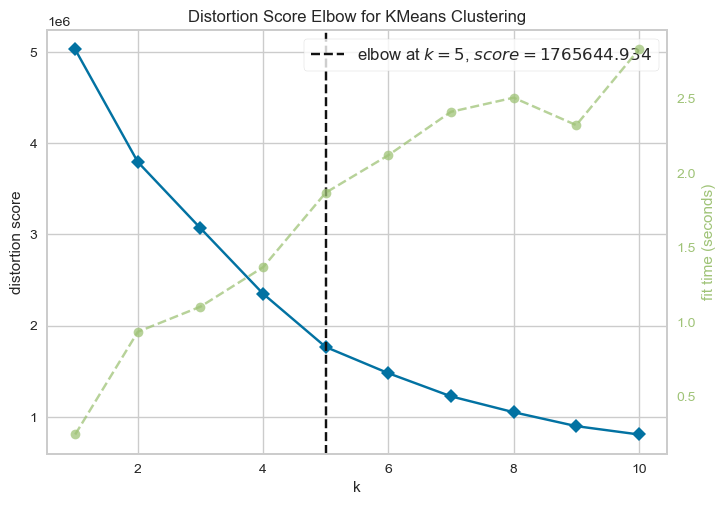

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(fact_scale)
visualizer.show()

In [13]:
import numpy as np


# Create the model
kmeans = KMeans(n_clusters=5, random_state=13)

# Fit the model to the data
kmeans.fit(fact_scale)

KMeans(n_clusters=5, random_state=13)

In [14]:
fact['labels'] = kmeans.labels_

In [15]:
res = fact.groupby(by='labels').mean()

In [18]:
res['% Flights'] = v[0]

In [19]:
res

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,% Flights
labels,,,,,,,,
0,29.075467,28.138822,0.370872,0.0,0.071447,0.411684,1.000000,0.027361
1,10.874411,12.126160,0.000000,0.0,0.038123,0.025856,0.000000,0.319064
2,25.417989,25.443001,0.493506,1.0,0.062049,0.341510,0.005772,0.002895
3,36.541711,27.502474,0.021744,0.0,0.728671,0.685079,0.000000,0.345216
4,14.930793,25.152690,0.999631,0.0,0.461481,0.371657,0.000000,0.305464


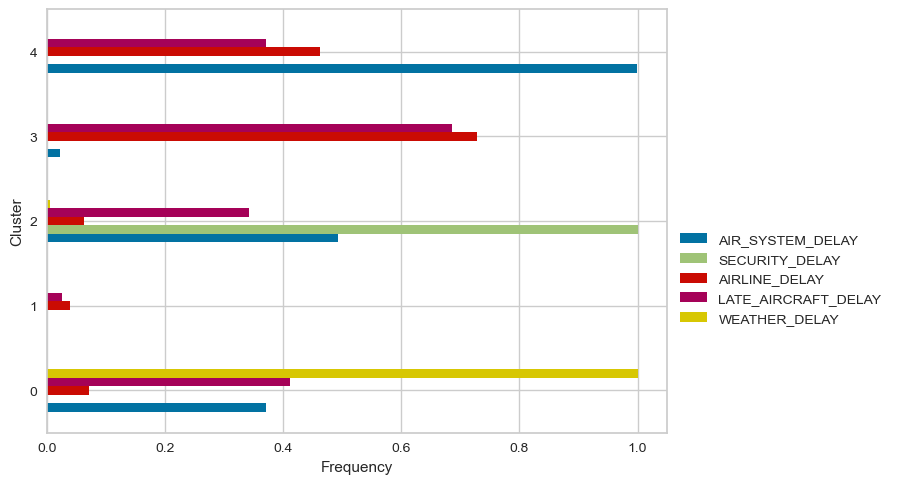

In [34]:
import matplotlib.pyplot as plt 
res.loc[:,'AIR_SYSTEM_DELAY':'WEATHER_DELAY'].plot.barh()
plt.ylabel('Cluster')
plt.xlabel('Frequency')
plt.legend(bbox_to_anchor =(1, 0.5))

In [388]:
# unknown delay causes (30%)
# flight delays caused by air system delay (31%)
# flight delay caused by the airline(catering, staff) and the late aircraft (34%)
# flight delay caused by security (0.2%)
# delay caused by the weather (2%)

In [17]:
v = (fact.groupby(by='labels').size() / 718203).to_frame()

In [337]:
fact['ARRIVAL_DELAY'].mean()

21.8901160256919

In [340]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, covariance_type='full', max_iter=20, 
                      random_state=0)
y_pred = gmm.fit_predict(fact_scale)

In [341]:
fact['labels'] = y_pred
res = fact.groupby(by='labels').mean()
res

,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
labels,,,,,,
0,11.848790,0.000000,0.0,0.000000,0.000000,0.000000
1,26.591764,0.000000,0.0,0.719351,0.663041,0.000000
2,28.138822,0.370872,0.0,0.071447,0.411684,1.000000
3,25.515801,1.000000,0.0,0.469962,0.386115,0.000000
4,25.443001,0.493506,1.0,0.062049,0.341510,0.005772


In [ ]:
# # read the needed columns from the fact table
# fact = pd.read_csv('flights_fact.csv', usecols=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
# 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'delayed', 'ARRIVAL_DELAY', 'DEPARTURE_DELAY'])

# # keep the delayed flights only
# fact = fact[fact['delayed']==1]

# # turn the AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY AND WEATHER_DELAY in boolean
# fact['AIR_SYSTEM_DELAY'] = fact['AIR_SYSTEM_DELAY'].mask(fact['AIR_SYSTEM_DELAY'] > 1, 1)
# fact['SECURITY_DELAY'] = fact['SECURITY_DELAY'].mask(fact['SECURITY_DELAY'] > 1, 1)
# fact['AIRLINE_DELAY'] = fact['AIRLINE_DELAY'].mask(fact['AIRLINE_DELAY'] > 1, 1)
# fact['LATE_AIRCRAFT_DELAY'] = fact['LATE_AIRCRAFT_DELAY'].mask(fact['LATE_AIRCRAFT_DELAY'] > 1, 1)
# fact['WEATHER_DELAY'] = fact['WEATHER_DELAY'].mask(fact['WEATHER_DELAY'] > 1, 1)

# # drop the delayed variable
# fact.drop(columns=['delayed'], inplace=True)

# # scale the data 
# scaler = StandardScaler()
# X = scaler.fit_transform(fact)
# fact_scale = pd.DataFrame(X, index=fact.index, 
#                              columns=fact.columns)

# # Create the model
# kmeans = KMeans(n_clusters=5, random_state=13)

# # Fit the model to the data and add the labels attribute to get the results
# kmeans.fit(fact_scale)
# fact['labels'] = kmeans.labels_
# res = fact.groupby(by='labels').mean()